In [12]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline


### Create Antecedent and Consequent Objects

In [2]:
# Define the range for speed and incline
speed_range = np.arange(0, 81, 1)  # Speed from 0 to 80 Km/H
incline_range = np.arange(-15, 16, 1)  # Incline from -15 to 15 degrees

# Create the Antecedent objects for speed and incline
speed = ctrl.Antecedent(speed_range, 'speed')
incline = ctrl.Antecedent(incline_range, 'incline')

# Create the Consequent object for gear with 'mom' as the defuzzification method
gear = ctrl.Consequent(np.arange(1, 6, 1), 'gear', defuzzify_method='mom')


### Define Speed Membership Function

C:\Users\patsh\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


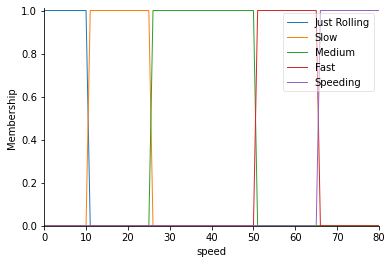

In [14]:
# Define membership functions for speed
speed['Just Rolling'] = fuzz.trapmf(speed.universe, [0, 0, 10, 10])
speed['Slow'] = fuzz.trapmf(speed.universe, [11, 11, 25, 25])
speed['Medium'] = fuzz.trapmf(speed.universe, [26, 26, 50, 50])
speed['Fast'] = fuzz.trapmf(speed.universe, [51, 51, 65, 65])
speed['Speeding'] = fuzz.trapmf(speed.universe, [66, 66, 80, 80])

speed.view()

### Define Incline Membership Function

C:\Users\patsh\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


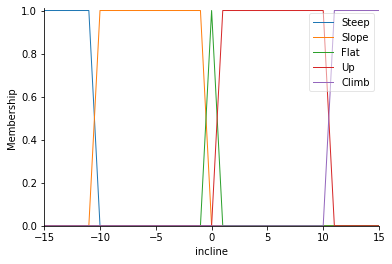

In [4]:
# Define membership functions for incline
incline['Steep'] = fuzz.trapmf(incline.universe,[-15,-15,-11,-11])
incline['Slope'] = fuzz.trapmf(incline.universe,[-10,-10,-1,-1])
incline['Flat'] = fuzz.trimf(incline.universe, [0, 0, 0])
incline['Up'] = fuzz.trapmf(incline.universe,[1,1,10,10])
incline['Climb'] = fuzz.trapmf(incline.universe,[11,11,15,15])

incline.view()

### Define Gear Membership Function

C:\Users\patsh\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


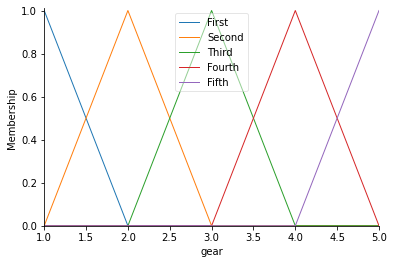

In [7]:
# Membership functions for gear
gear['First'] = fuzz.trimf(gear.universe, [0, 1, 2])
gear['Second'] = fuzz.trimf(gear.universe, [1, 2, 3])
gear['Third'] = fuzz.trimf(gear.universe, [2, 3, 4])
gear['Fourth'] = fuzz.trimf(gear.universe, [3, 4, 5])
gear['Fifth'] = fuzz.trimf(gear.universe, [4, 5, 6])
gear.view()

### Define Rules and Create Control System Object

In [8]:
# Define the rules for each table entry
rules = []

# Just Rolling
rules.append(ctrl.Rule(speed['Just Rolling'] & incline['Steep'], gear['Second']))
rules.append(ctrl.Rule(speed['Just Rolling'] & incline['Slope'], gear['First']))
rules.append(ctrl.Rule(speed['Just Rolling'] & incline['Flat'], gear['First']))
rules.append(ctrl.Rule(speed['Just Rolling'] & incline['Up'], gear['First']))
rules.append(ctrl.Rule(speed['Just Rolling'] & incline['Climb'], gear['First']))

# Slow
rules.append(ctrl.Rule(speed['Slow'] & incline['Steep'], gear['Third']))
rules.append(ctrl.Rule(speed['Slow'] & incline['Slope'], gear['Second']))
rules.append(ctrl.Rule(speed['Slow'] & incline['Flat'], gear['Second']))
rules.append(ctrl.Rule(speed['Slow'] & incline['Up'], gear['First']))
rules.append(ctrl.Rule(speed['Slow'] & incline['Climb'], gear['First']))

# Medium
rules.append(ctrl.Rule(speed['Medium'] & incline['Steep'], gear['Fourth']))
rules.append(ctrl.Rule(speed['Medium'] & incline['Slope'], gear['Fourth']))
rules.append(ctrl.Rule(speed['Medium'] & incline['Flat'], gear['Third']))
rules.append(ctrl.Rule(speed['Medium'] & incline['Up'], gear['Third']))
rules.append(ctrl.Rule(speed['Medium'] & incline['Climb'], gear['Second']))

# Fast
rules.append(ctrl.Rule(speed['Fast'] & incline['Steep'], gear['Fifth']))
rules.append(ctrl.Rule(speed['Fast'] & incline['Slope'], gear['Fifth']))
rules.append(ctrl.Rule(speed['Fast'] & incline['Flat'], gear['Fourth']))
rules.append(ctrl.Rule(speed['Fast'] & incline['Up'], gear['Fourth']))
rules.append(ctrl.Rule(speed['Fast'] & incline['Climb'], gear['Fourth']))

# Speeding
rules.append(ctrl.Rule(speed['Speeding'] & incline['Steep'], gear['Fifth']))
rules.append(ctrl.Rule(speed['Speeding'] & incline['Slope'], gear['Fifth']))
rules.append(ctrl.Rule(speed['Speeding'] & incline['Flat'], gear['Fifth']))
rules.append(ctrl.Rule(speed['Speeding'] & incline['Up'], gear['Fourth']))
rules.append(ctrl.Rule(speed['Speeding'] & incline['Climb'], gear['Fourth']))

# Create a control system with these rules
gear_selector_ctrl = ctrl.ControlSystem(rules)

### Simulate System

In [9]:
# Create a simulation object
gear_selector = ctrl.ControlSystemSimulation(gear_selector_ctrl)

### Test Input

In [10]:
# Test the fuzzy inference system with sample inputs
sample_inputs = [
    {'speed': 15, 'incline': -12},
    {'speed': 80, 'incline': 5},
    {'speed': 45, 'incline': 0},
    {'speed': 21, 'incline': 10},
    {'speed': 75, 'incline': -3}
]

# Execute the system with each set of inputs and collect outputs
for inputs in sample_inputs:
    gear_selector.input['speed'] = inputs['speed']
    gear_selector.input['incline'] = inputs['incline']
    gear_selector.compute()
    print(f"Speed: {inputs['speed']} Km/H, Incline: {inputs['incline']} Degrees -> Gear: {gear_selector.output['gear']}")


Speed: 15 Km/H, Incline: -12 Degrees -> Gear: 3.0
Speed: 80 Km/H, Incline: 5 Degrees -> Gear: 4.0
Speed: 45 Km/H, Incline: 0 Degrees -> Gear: 3.0
Speed: 21 Km/H, Incline: 10 Degrees -> Gear: 1.0
Speed: 75 Km/H, Incline: -3 Degrees -> Gear: 5.0
